In [259]:
# Senior Design 2, Fall 2019 @ CCNY
# Team Member & Name: Team 5 (4 member team)

# PRAVEENA SHRESTHA 
# ABDUR RAFEY
# STANLEY WONG
# JOHN CHEN

In [316]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import warnings
%matplotlib inline

In [317]:
train_df = pd.read_csv('dnc_complaint_numbers_2019-11-25.csv', index_col=0)
test_df = pd.read_csv('dnc_complaint_numbers_2019-10-21.csv', index_col=0)
submit1_df = pd.read_csv('dnc_complaint_numbers_2019-11-11.csv', index_col=0)


In [318]:
# Array using Consumer_States Provided
StateArray = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia',
             'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland',
             'Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey',
             'New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
             'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming',
              'Ontario, Canada','District of Columbia','Virgin Islands','Puerto Rico','Northern Mariana Islands','US Military Pacific']

# Array corresponding Consumer_State number 
CorrStateNum = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50,
                51,52,53,54,55,56
               ]

# REPLACE Consumer_State Array with Corresponding Consumer_State Number Array
train_df = train_df.replace(StateArray, CorrStateNum)
test_df = test_df.replace(StateArray, CorrStateNum)
submit1_df = submit1_df.replace(StateArray, CorrStateNum)

modifiedtrain = train_df
modifiedtest = test_df
modifiedsubmit = submit1_df


# Replace scam call strings with integers: 1 -> Yes, 0 -> No
modifiedtrain = train_df['Recorded_Message_Or_Robocall'] = train_df['Recorded_Message_Or_Robocall'].replace('Y', 1)
modifiedtrain = train_df['Recorded_Message_Or_Robocall'] = train_df['Recorded_Message_Or_Robocall'].replace('N', 0)

modifiedtest = test_df['Recorded_Message_Or_Robocall'] = test_df['Recorded_Message_Or_Robocall'].replace('Y', 1)
modifiedtest = test_df['Recorded_Message_Or_Robocall'] = test_df['Recorded_Message_Or_Robocall'].replace('N', 0)

modifiedsubmit = submit1_df['Recorded_Message_Or_Robocall'] = submit1_df['Recorded_Message_Or_Robocall'].replace('Y', 1)
modifiedsubmit = submit1_df['Recorded_Message_Or_Robocall'] = submit1_df['Recorded_Message_Or_Robocall'].replace('N', 0)

# remove all null values
modifiedtrain = train_df.dropna()
modifiedtest = test_df.dropna()
modifiedsubmit = submit1_df.dropna()

# Display 20 samples
modifiedtrain.sample(20)


,Created_Date,Violation_Date,Consumer_City,Consumer_State,Consumer_Area_Code,Subject,Recorded_Message_Or_Robocall
Company_Phone_Number,,,,,,,
8005687894,2019-11-22 13:33:46,2019-11-22 10:25:00,Oakland,5.0,510,Dropped call or no message,1.0
8019023100,2019-11-22 16:44:03,2019-11-22 11:46:00,Paoli,14.0,812,Other,0.0
4107702920,2019-11-23 16:56:18,2019-11-23 13:10:00,GOLDTHWAITE,43.0,970,Other,1.0
6365292700,2019-11-22 13:25:49,2019-11-22 12:21:00,Liberty,25.0,816,No Subject Provided,1.0
3109127417,2019-11-22 12:07:38,2019-11-21 17:40:00,Roseville,5.0,916,No Subject Provided,1.0
8006698488,2019-11-22 15:27:49,2019-11-22 14:47:00,Alexandria,46.0,703,"Reducing your debt (credit cards, mortgage, st...",1.0
4108266461,2019-11-24 09:19:02,2019-11-23 08:00:00,Red hill,38.0,302,Other,1.0
2295245112,2019-11-22 19:24:56,2019-11-22 18:38:00,Dallas,10.0,678,"Reducing your debt (credit cards, mortgage, st...",1.0
8007291324,2019-11-22 12:05:03,2019-11-22 08:53:00,spring valley,5.0,619,No Subject Provided,1.0


In [319]:
# extract usable features
feature_cols = [ 
    'Recorded_Message_Or_Robocall',
    'Consumer_State'
]
train_features = modifiedtrain[feature_cols] 


# construct target vector, dependent variables
train_target = modifiedtrain['Consumer_Area_Code']

In [320]:
# using linear regression method
lreg = LinearRegression()
lreg.fit(train_features, train_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [321]:
test_features = modifiedtest[feature_cols] 

# construct predictions 
modifiedtest['predicted'] = lreg.predict(test_features)
print("Prediction using Linear Regression train data against Test1:")

print("Mean Squared Error for Test1 using Linear Regression:",mean_squared_error(modifiedtest['Consumer_Area_Code'], modifiedtest['predicted']))

Prediction using Linear Regression train data against Test1:
Mean Squared Error for Test1 using Linear Regression: 56450.267243459275


/Users/PJ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [322]:
rf = RandomForestRegressor()
rf.fit(train_features, train_target)

# construct predictions 
modifiedtest['predicted'] = rf.predict(test_features)
print("Prediction using Random Forest Regressor train data against Test1:")
print("Mean Squared Error for Test1 using Random Forest Regressor:",mean_squared_error(modifiedtest['Consumer_Area_Code'], modifiedtest['predicted']))

Prediction using Random Forest Regressor train data against Test1:
Mean Squared Error for Test1 using Random Forest Regressor: 47148.55534737281


/Users/PJ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [323]:
#joining training data and test1 data to incredase total training data
master_df = modifiedtrain.append(modifiedtest, sort=False)

master_features = master_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
master_target = master_df['Consumer_Area_Code']
#linear regression
#lreg.fit(master_features, master_target)

#Random Forest Regressor
rf.fit(master_features, master_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [324]:
#handling missing data
submit1_features = modifiedsubmit[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit1_features.sample(20)
# 1 -> Yes, 0 -> No

,Recorded_Message_Or_Robocall,Consumer_State
Company_Phone_Number,,
8008362002,1.0,20
5713471655,1.0,3
NaN,1.0,35
2674403244,0.0,46
3128477152,1.0,46
6367488759,1.0,38
8008962272,0.0,32
7343759249,1.0,22
7205389701,0.0,9


In [325]:
#submit1_features = submit1_df[feature_cols].fillna(submit1_df[feature_cols].median(), axis=0)
modifiedsubmit['Consumer_Area_Code'] = rf.predict(submit1_features)
modifiedsubmit['Consumer_Area_Code'].to_csv('test2.csv', header=True)

#these part has to be changed
#submit1_df['median_CAC'] = np.ones(modifiedsubmit['Consumer_Area_Code'].shape) * master_target.median()
#print("Prediction of rent for Test2")
#print("Mean Squared error for Test2: ",mean_squared_error(submit1_df['rent'], submit1_df['median_CAC']))

/Users/PJ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [332]:
modifiedsubmit['Consumer_Area_Code'].sample(100)

Company_Phone_Number
2814837447    619.276493
7193474115    598.394998
5126383415    281.916358
4108854472    597.870038
8006227747    706.133158
8336068362    600.052429
2149976245    354.445323
7736996525    375.935341
8007950405    632.385615
2126104468    655.536204
4694232782    647.131684
3525297662    647.131684
9525293008    549.564032
9547649204    632.385615
3309079057    505.119003
8888852457    655.536204
3373485259    727.636478
2034464289    598.684967
2055283918    306.025617
7025336645    598.394998
4057590168    581.403556
7068305332    601.993776
3022662622    306.025617
2015754507    632.385615
8005456092    598.394998
3184020402    605.005933
7472120915    655.536204
3525770994    542.863808
4083587710    655.536204
7046803152    804.765425
                 ...    
8002752273    605.005933
9516585598    655.536204
9183210091    667.546882
6109049672    569.664243
6096069030    631.732967
8006272198    655.536204
2082644591    250.752298
3859876972    432.671882
9388

In [331]:
# It's taking numbers from the public database
# Learning its patterns and creates a "Spam Phone Number" based on the dataset
# as well as the Consumer_Area_Code

# TESTED EACH Company_Phone_Number
    # Some phone numbers are randomly generated
    # Some already exists within the CSV file
        # But area code could be randomly generated
    # Some take a specific pattern and generates the rest of the numbers

# POSSIBILITY OF THIS DATASET
    # False Positive 
        # With these generated Phone Numbers and Area Codes
        # We can have our system compare to see if its a 1 or 0
            # 1 = YES scam , 0 = NO scam


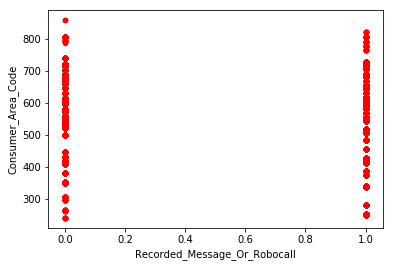

ValueError: scatter requires x column to be numeric

In [328]:
# Scatter plots of different features for test2 data: 

modifiedsubmit.plot(kind='scatter',x='Recorded_Message_Or_Robocall',y='Consumer_Area_Code',color='red')
plt.show()

modifiedsubmit.plot(kind='scatter',x='Consumer_State',y='Consumer_Area_Code',color='blue')
plt.show()


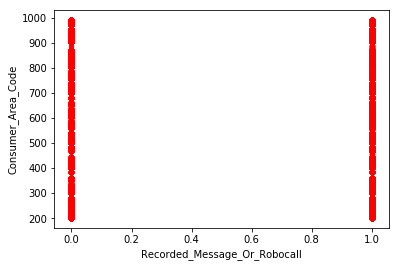

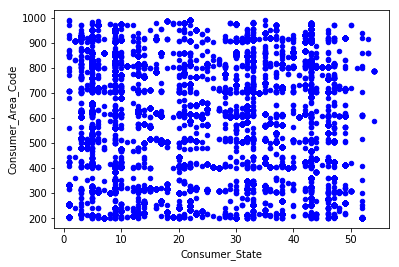

In [298]:
# Scatter plots of different features for training data: 

master_df.plot(kind='scatter',x='Recorded_Message_Or_Robocall',y='Consumer_Area_Code',color='red')
plt.show()

master_df.plot(kind='scatter',x='Consumer_State',y='Consumer_Area_Code',color='blue')
plt.show()


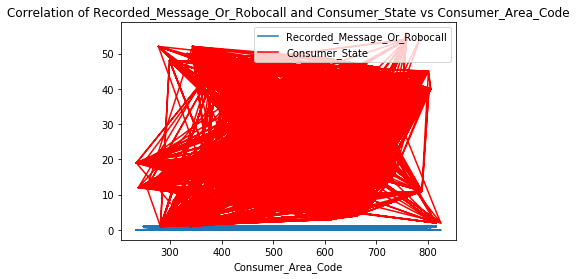

In [301]:
ax = plt.gca()
modifiedsubmit.plot(kind='line',x='Consumer_Area_Code',y='Recorded_Message_Or_Robocall',title='Correlation of Recorded_Message_Or_Robocall and Consumer_State vs Consumer_Area_Code',ax=ax)
modifiedsubmit.plot(kind='line',x='Consumer_Area_Code',y='Consumer_State', color='red', ax=ax)
plt.show()